In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns1
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.manifold import TSNE

C:\Users\Asus\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
con = sqlite3.connect('final.sqlite') 
final1 = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score = 'positive' limit 2000 """, con) 
final2 = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score = 'negative' limit 2000 """, con) 
final = pd.concat([final1, final2])

In [3]:
label_2k = final['Score']

## [5.1] Applying TNSE on Text BOW vectors

In [4]:
count_vect = CountVectorizer(ngram_range=(1,2)) 
final_counts = count_vect.fit_transform(final['CleanedText'].values)
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200)
svd.fit(final_counts.T)
final_counts2k_2 = svd.components_
print(svd.explained_variance_ratio_.sum()) 
from sklearn.preprocessing import StandardScaler
final_counts2_2k = StandardScaler().fit_transform(final_counts2k_2.T)

0.502437846330697


C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


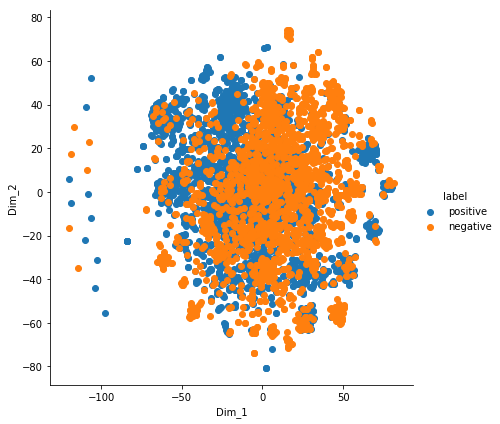

In [22]:
# perplexity=10, n_iter=1000
model = TSNE(n_components=2, perplexity=10, n_iter=1000, random_state=0)
tsne_data = model.fit_transform(final_counts2_2k)
tsne_data = np.vstack((tsne_data.T, label_2k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


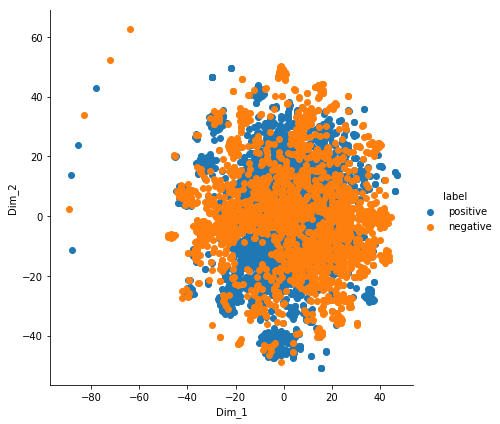

In [23]:
# perplexity=25, n_iter=1000
model = TSNE(n_components=2, perplexity=25, n_iter=1000, random_state=0)
tsne_data = model.fit_transform(final_counts2_2k)
tsne_data = np.vstack((tsne_data.T, label_2k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


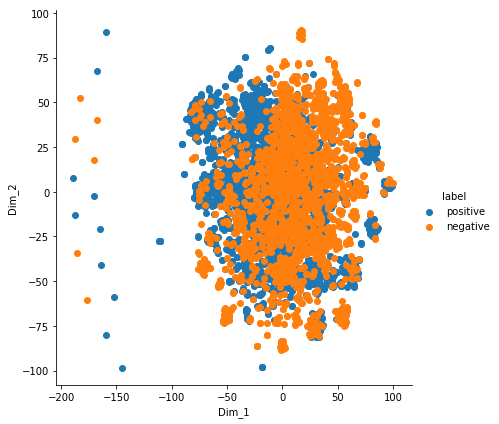

In [24]:
# perplexity=10, n_iter=2000
model = TSNE(n_components=2, perplexity=10, n_iter=2000, random_state=0)
tsne_data = model.fit_transform(final_counts2_2k)
tsne_data = np.vstack((tsne_data.T, label_2k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


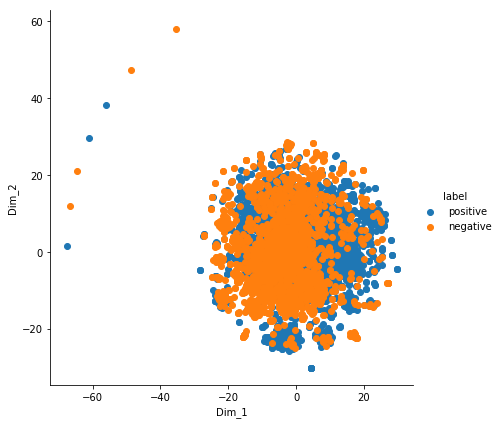

In [25]:
# perplexity=50, n_iter=1000
model = TSNE(n_components=2, perplexity=50, n_iter=1000, random_state=0)
tsne_data = model.fit_transform(final_counts2_2k)
tsne_data = np.vstack((tsne_data.T, label_2k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


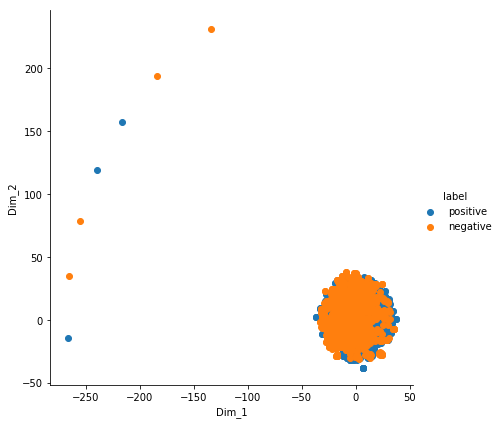

In [26]:
# perplexity=50, n_iter=10000
model = TSNE(n_components=2, perplexity=50, n_iter=10000, random_state=0)
tsne_data = model.fit_transform(final_counts2_2k)
tsne_data = np.vstack((tsne_data.T, label_2k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


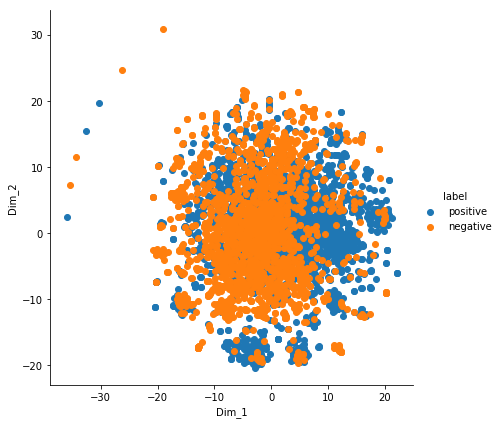

In [27]:
# perplexity=50, n_iter=500
model = TSNE(n_components=2, perplexity=50, n_iter=500, random_state=0)
tsne_data = model.fit_transform(final_counts2_2k)
tsne_data = np.vstack((tsne_data.T, label_2k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


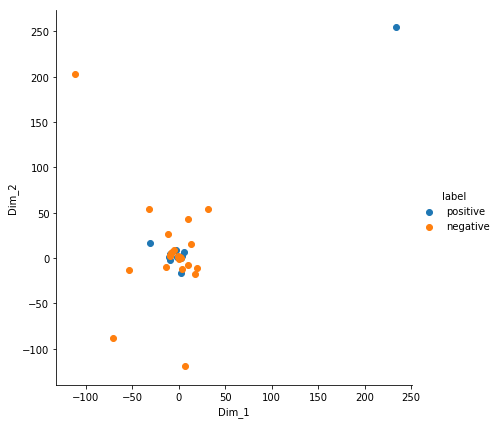

In [29]:
# perplexity=50, n_iter=250
model = TSNE(n_components=2, perplexity=50, n_iter=250, random_state=0)
tsne_data = model.fit_transform(final_counts2_2k)
tsne_data = np.vstack((tsne_data.T, label_2k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


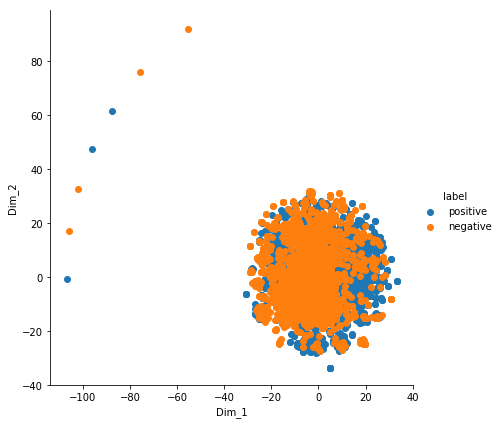

In [30]:
# perplexity=50, n_iter=2000
model = TSNE(n_components=2, perplexity=50, n_iter=2000, random_state=0)
tsne_data = model.fit_transform(final_counts2_2k)
tsne_data = np.vstack((tsne_data.T, label_2k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


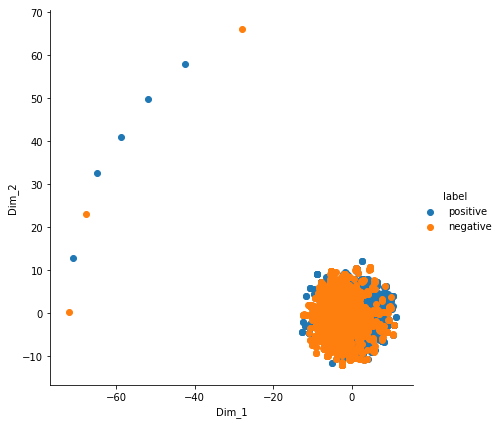

In [31]:
# perplexity=100, n_iter=2000
model = TSNE(n_components=2, perplexity=100, n_iter=2000, random_state=0)
tsne_data = model.fit_transform(final_counts2_2k)
tsne_data = np.vstack((tsne_data.T, label_2k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


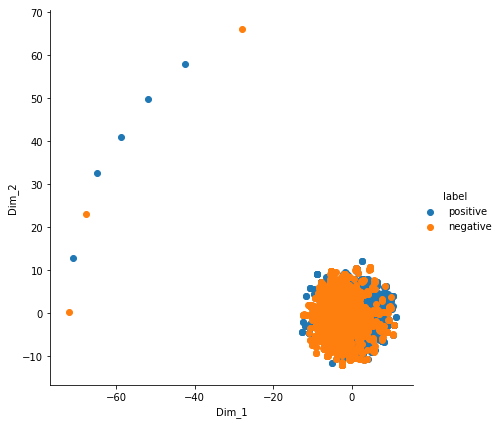

In [32]:
# perplexity=100, n_iter=2000
model = TSNE(n_components=2, perplexity=100, n_iter=2000, random_state=0)
tsne_data = model.fit_transform(final_counts2_2k)
tsne_data = np.vstack((tsne_data.T, label_2k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


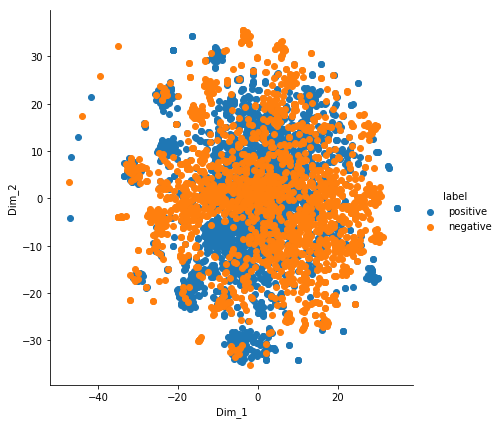

In [33]:
# perplexity=25, n_iter=500
model = TSNE(n_components=2, perplexity=25, n_iter=500, random_state=0)
tsne_data = model.fit_transform(final_counts2_2k)
tsne_data = np.vstack((tsne_data.T, label_2k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


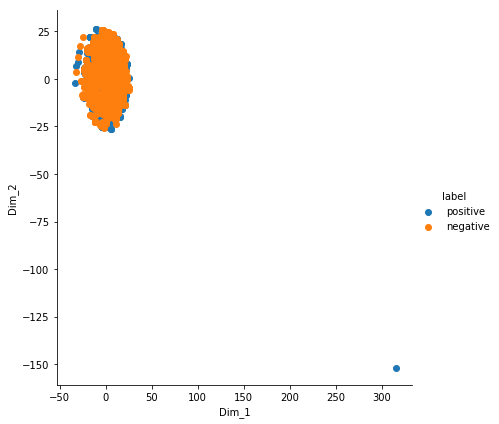

In [34]:
# perplexity=25, n_iter=400
model = TSNE(n_components=2, perplexity=25, n_iter=400, random_state=0)
tsne_data = model.fit_transform(final_counts2_2k)
tsne_data = np.vstack((tsne_data.T, label_2k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


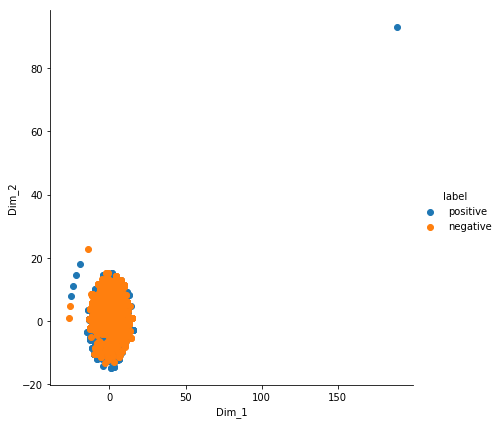

In [35]:
# perplexity=80, n_iter=400
model = TSNE(n_components=2, perplexity=80, n_iter=450, random_state=0)
tsne_data = model.fit_transform(final_counts2_2k)
tsne_data = np.vstack((tsne_data.T, label_2k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


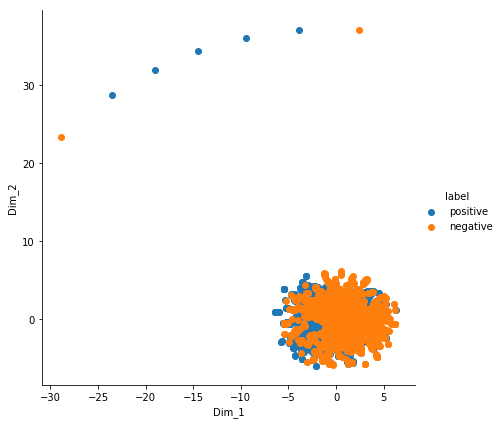

In [36]:
# perplexity=200, n_iter= 1000
model = TSNE(n_components=2, perplexity=200, n_iter=1000, random_state=0)
tsne_data = model.fit_transform(final_counts2_2k)
tsne_data = np.vstack((tsne_data.T, label_2k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


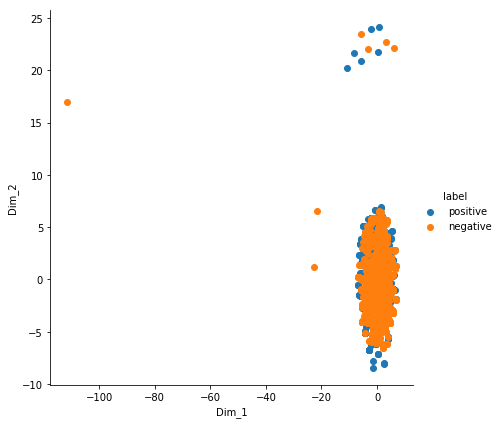

In [6]:
# perplexity=200, n_iter= 500
model = TSNE(n_components=2, perplexity=200, n_iter=500, random_state=0)
tsne_data = model.fit_transform(final_counts2_2k)
tsne_data = np.vstack((tsne_data.T, label_2k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

## [5.2] Applying TNSE on Text TFIDF vectors

In [4]:
count_vect = TfidfVectorizer(ngram_range=(1,2)) 
final_counts = count_vect.fit_transform(final['CleanedText'].values)
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200)
svd.fit(final_counts.T)
final_counts2k_2 = svd.components_
print(svd.explained_variance_ratio_.sum()) 
from sklearn.preprocessing import StandardScaler
final_counts2_2k = StandardScaler().fit_transform(final_counts2k_2.T)

0.17028251173899026


C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


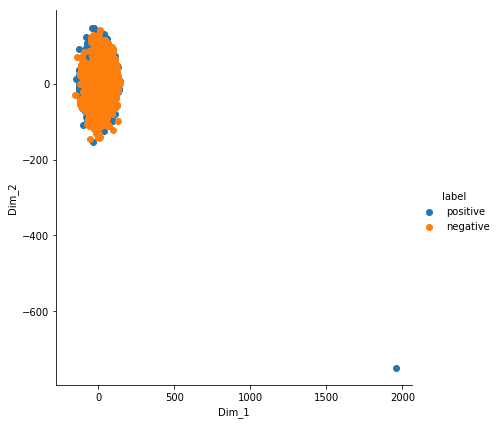

In [7]:
# perplexity=10, n_iter=1000
model = TSNE(n_components=2, perplexity=10, n_iter=1000, random_state=0)
tsne_data = model.fit_transform(final_counts2_2k)
tsne_data = np.vstack((tsne_data.T, label_2k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


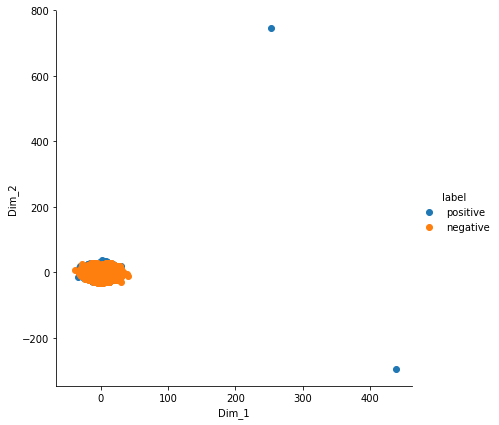

In [8]:
# perplexity=80, n_iter=400
model = TSNE(n_components=2, perplexity=80, n_iter=450, random_state=0)
tsne_data = model.fit_transform(final_counts2_2k)
tsne_data = np.vstack((tsne_data.T, label_2k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


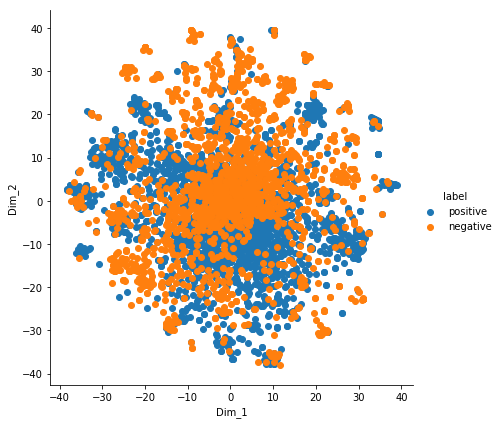

In [9]:
# perplexity=25, n_iter=500
model = TSNE(n_components=2, perplexity=25, n_iter=500, random_state=0)
tsne_data = model.fit_transform(final_counts2_2k)
tsne_data = np.vstack((tsne_data.T, label_2k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

## [5.3] Applying TNSE on Text Avg W2V vectors

In [10]:
list_of_sent=[]
for sent in final['CleanedText'].values:
    list_of_sent.append(sent.split())

In [11]:
# min_count = 5 considers only words that occured atleast 5 times
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)

C:\Users\Asus\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [12]:
w2v_words = list(w2v_model.wv.vocab)

In [13]:
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)

100%|█████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:06<00:00, 589.09it/s]


In [23]:
final_counts2_2k = pd.DataFrame(np.row_stack(sent_vectors))

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


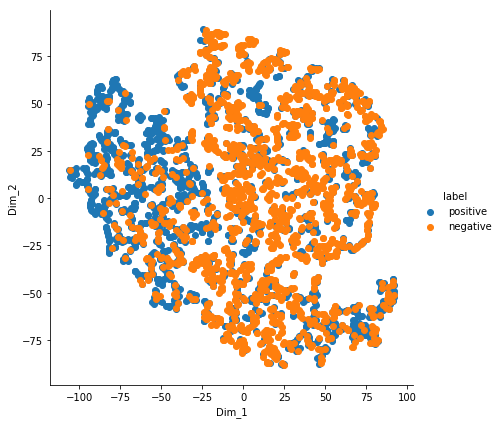

In [25]:
# perplexity=10, n_iter=1000
model = TSNE(n_components=2, perplexity=10, n_iter=1000, random_state=0)
tsne_data = model.fit_transform(final_counts2_2k)
tsne_data = np.vstack((tsne_data.T, label_2k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


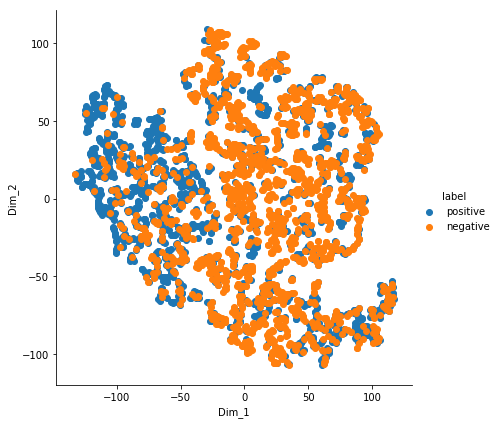

In [26]:
# perplexity=10, n_iter=2000
model = TSNE(n_components=2, perplexity=10, n_iter=2000, random_state=0)
tsne_data = model.fit_transform(final_counts2_2k)
tsne_data = np.vstack((tsne_data.T, label_2k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


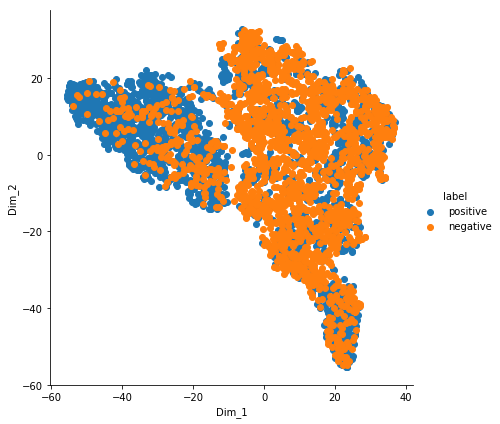

In [27]:
# perplexity=80, n_iter=1000
model = TSNE(n_components=2, perplexity=80, n_iter=1000, random_state=0)
tsne_data = model.fit_transform(final_counts2_2k)
tsne_data = np.vstack((tsne_data.T, label_2k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

## [5.4] Applying TNSE on Text TFIDF weighted W2V vectors

In [28]:
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(final['CleanedText'].values)
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [ ]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

In [32]:
final_counts2_2k = pd.DataFrame(np.row_stack(tfidf_sent_vectors))

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


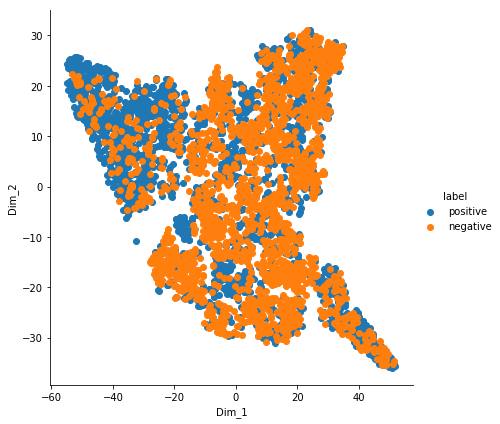

In [33]:
# perplexity=80, n_iter=1000
model = TSNE(n_components=2, perplexity=80, n_iter=1000, random_state=0)
tsne_data = model.fit_transform(final_counts2_2k)
tsne_data = np.vstack((tsne_data.T, label_2k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


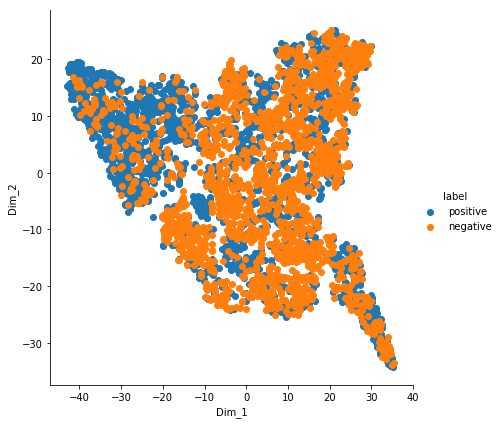

In [34]:
# perplexity=80, n_iter=500
model = TSNE(n_components=2, perplexity=80, n_iter=500, random_state=0)
tsne_data = model.fit_transform(final_counts2_2k)
tsne_data = np.vstack((tsne_data.T, label_2k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# [6] Conclusions

1. We can visualize separation of the positive and negative reviews using Average Word2Vec and TFIDF weighted Word2Vec featurization. 
2. The separation is not present in BOW and TFIDF featurized data. The reason could be truncating of data (using TruncatedSVD) which results in less variance of data.